In [1]:
%matplotlib inline

from glob import glob

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import warnings
from functools import partial

Open a couple datasets, and plot each of them individually, and combined. Next step is to take a list of filenames and generate all of them individually, plus the summed 2D histograms.

In [2]:
track_categories = [
    "track_has_any",
    "track_has_zdr_kdp_ltg",
    "track_has_zdr_kdp_only",
    "track_has_zdr_ltg_only",
    "track_has_zdr_only",
    "track_has_nothing",
    "track_has_kdp_only",
    "track_has_kdp_ltg_only",
    "track_has_ltg_only",
    ]
this_category = "track_has_any"
const_melt = True

In [3]:
# all_histos_both_melt = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data*.nc'))
# const_melt_histos = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data*4400.nc'))
# # The 4 June case has the same melting height our constant case
# vary_melt_histos = sorted([hf for hf in all_histos_both_melt if not(hf in const_melt_histos)] 
#                     + glob('/efs/tracer/NEXRAD/tobac_Save_20220604/histogram_data*4400.nc'))

# # Just look at one day
# # all_histos_both_melt = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_20220807/histogram_data*.nc'))
# # const_melt_histos = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_20220807/histogram_data*4400.nc'))

# # for hf in zip(const_melt_histos, vary_melt_histos):
#     # print(hf)

# assert len(vary_melt_histos) == len(const_melt_histos)

# if const_melt:
#     all_histos = const_melt_histos
# else:
#     all_histos = vary_melt_histos

In [4]:
pathstring = '/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data_{0}_melt4400.nc'.format(this_category.replace('_','-'))
all_histos = sorted(glob(pathstring))
print(all_histos)

['/efs/tracer/NEXRAD/tobac_Save_20220602/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220604/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220617/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220622/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220702/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220706/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220712/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220713/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220714/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220728/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220729/histogram_data_track-has-any_melt4400.nc', '/efs/tracer/NEXRAD/tobac_Save_20220801/histogram_data_track-has-any_melt4400.nc', '/e

In [5]:
# Diagnose a variable that doesn't seem to be there.
for hfn in all_histos:
    hds = xr.open_dataset(hfn)
    findme = 'histogram_feature_flash_count_area_time_norm_feature_kdpcol_area_time_norm'
    print(hfn.split('/')[-2], findme in hds.variables)

tobac_Save_20220602 True
tobac_Save_20220604 True
tobac_Save_20220617 True
tobac_Save_20220622 True
tobac_Save_20220702 True
tobac_Save_20220706 True
tobac_Save_20220712 True
tobac_Save_20220713 True
tobac_Save_20220714 True
tobac_Save_20220728 True
tobac_Save_20220729 True
tobac_Save_20220801 True
tobac_Save_20220802 True
tobac_Save_20220803 True
tobac_Save_20220806 True
tobac_Save_20220807 True
tobac_Save_20220808 True
tobac_Save_20220813 True
tobac_Save_20220821 True
tobac_Save_20220825 True
tobac_Save_20220827 True
tobac_Save_20220831 True
tobac_Save_20220901 True
tobac_Save_20220915 True
tobac_Save_20220917 True


In [6]:
odd_ds = xr.open_dataset('/efs/tracer/NEXRAD/tobac_Save_20220803/histogram_data_track-has-zdr-kdp-only_melt4400.nc')

In [7]:
odd_ds

<xarray.Dataset>
Dimensions:                                                                                         (
                                                                                                     feature_flash_count_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_total_area_time_norm_bin: 21,
                                                                                                     feature_kdpvol_area_time_norm_bin: 21,
                                                                                                     feature_kdpwt_total_area_time_norm_bin: 21,
                                                                                                     ...
                                                                                                     feature_flash_count_bin: 21,
                                                                                                     feature_kdpcol_bin: 21,
                                                                                                     feature_rhvdeficitcol_bin: 21,
                                                                                                     feature_zdrvol_bin: 21,
                                                                                                     percentile_thresholds: 3,
                                                                                                     track_count: 1)
Coordinates: (12/24)
  * feature_flash_count_area_time_norm_bin                                                          (feature_flash_count_area_time_norm_bin) float64 ...
  * feature_kdpcol_area_time_norm_bin                                                               (feature_kdpcol_area_time_norm_bin) float64 ...
  * feature_kdpcol_total_area_time_norm_bin                                                         (feature_kdpcol_total_area_time_norm_bin) float64 ...
  * feature_kdpvol_area_time_norm_bin                                                               (feature_kdpvol_area_time_norm_bin) float64 ...
  * feature_kdpwt_total_area_time_norm_bin                                                          (feature_kdpwt_total_area_time_norm_bin) float64 ...
  * feature_nearby_count_10km_bin                                                                   (feature_nearby_count_10km_bin) float64 ...
    ...                                                                                              ...
  * feature_flash_count_bin                                                                         (feature_flash_count_bin) float64 ...
  * feature_kdpcol_bin                                                                              (feature_kdpcol_bin) float64 ...
  * feature_rhvdeficitcol_bin                                                                       (feature_rhvdeficitcol_bin) float64 ...
  * feature_zdrvol_bin                                                                              (feature_zdrvol_bin) float64 ...
  * percentile_thresholds                                                                           (percentile_thresholds) int64 ...
  * track_count                                                                                     (track_count) int64 ...
Data variables: (12/258)
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_area_time_norm                      (feature_flash_count_area_time_norm_bin, feature_kdpcol_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_total_area_time_norm                (feature_flash_count_area_time_norm_bin, feature_kdpcol_total_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpvol_area_time

In [8]:
histo_ds2 = xr.open_dataset(all_histos[0])

In [9]:
histo_ds2

<xarray.Dataset>
Dimensions:                                                                                         (
                                                                                                     feature_flash_count_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_total_area_time_norm_bin: 21,
                                                                                                     feature_kdpvol_area_time_norm_bin: 21,
                                                                                                     feature_kdpwt_total_area_time_norm_bin: 21,
                                                                                                     ...
                                                                                                     feature_flash_count_bin: 21,
                                                                                                     feature_kdpcol_bin: 21,
                                                                                                     feature_rhvdeficitcol_bin: 21,
                                                                                                     feature_zdrvol_bin: 21,
                                                                                                     percentile_thresholds: 3,
                                                                                                     track_count: 1)
Coordinates: (12/24)
  * feature_flash_count_area_time_norm_bin                                                          (feature_flash_count_area_time_norm_bin) float64 ...
  * feature_kdpcol_area_time_norm_bin                                                               (feature_kdpcol_area_time_norm_bin) float64 ...
  * feature_kdpcol_total_area_time_norm_bin                                                         (feature_kdpcol_total_area_time_norm_bin) float64 ...
  * feature_kdpvol_area_time_norm_bin                                                               (feature_kdpvol_area_time_norm_bin) float64 ...
  * feature_kdpwt_total_area_time_norm_bin                                                          (feature_kdpwt_total_area_time_norm_bin) float64 ...
  * feature_nearby_count_10km_bin                                                                   (feature_nearby_count_10km_bin) float64 ...
    ...                                                                                              ...
  * feature_flash_count_bin                                                                         (feature_flash_count_bin) float64 ...
  * feature_kdpcol_bin                                                                              (feature_kdpcol_bin) float64 ...
  * feature_rhvdeficitcol_bin                                                                       (feature_rhvdeficitcol_bin) float64 ...
  * feature_zdrvol_bin                                                                              (feature_zdrvol_bin) float64 ...
  * percentile_thresholds                                                                           (percentile_thresholds) int64 ...
  * track_count                                                                                     (track_count) int64 ...
Data variables: (12/258)
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_area_time_norm                      (feature_flash_count_area_time_norm_bin, feature_kdpcol_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_total_area_time_norm                (feature_flash_count_area_time_norm_bin, feature_kdpcol_total_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpvol_area_time

In [10]:
def aggregate_histos(histo_filenames):
    histo_iter = (xr.open_dataset(fn) for fn in histo_filenames)
    cleaned = [ds.drop(['grid_time_start', 'grid_time_end']) for ds in histo_iter]
    N_histos = len(histo_filenames)
    ds = xr.combine_nested(cleaned, concat_dim='day', combine_attrs='override').sum(dim='day', keep_attrs=True)
    
    # Find the mean of the percentiles on each day.
    percentile_vars = [v for v in list(ds.variables.keys()) if 'percentile' in v]
    for v in percentile_vars:
        if 'thresholds' in v:
             pass
        else:
            ds[v] /= N_histos
    ds['track_maximum_distance_km'] /= N_histos
            
    return ds

In [11]:
agg_histo_ds = aggregate_histos(all_histos)

In [12]:
from itertools import combinations
paper_vars = ['feature_flash_count_area_time_norm',
 'feature_zdrwt_total_area_time_norm',
 'feature_kdpwt_total_area_time_norm',
 'feature_rhvdeficitwt_total_area_time_norm',
 'feature_nearby_count_20km_area_time_norm',
]

In [13]:
agg_histo_ds

<xarray.Dataset>
Dimensions:                                                                                         (
                                                                                                     feature_flash_count_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_area_time_norm_bin: 21,
                                                                                                     feature_kdpcol_total_area_time_norm_bin: 21,
                                                                                                     feature_kdpvol_area_time_norm_bin: 21,
                                                                                                     feature_kdpwt_total_area_time_norm_bin: 21,
                                                                                                     ...
                                                                                                     feature_flash_count_bin: 21,
                                                                                                     feature_kdpcol_bin: 21,
                                                                                                     feature_rhvdeficitcol_bin: 21,
                                                                                                     feature_zdrvol_bin: 21,
                                                                                                     percentile_thresholds: 3,
                                                                                                     track_count: 1)
Coordinates: (12/24)
  * feature_flash_count_area_time_norm_bin                                                          (feature_flash_count_area_time_norm_bin) float64 ...
  * feature_kdpcol_area_time_norm_bin                                                               (feature_kdpcol_area_time_norm_bin) float64 ...
  * feature_kdpcol_total_area_time_norm_bin                                                         (feature_kdpcol_total_area_time_norm_bin) float64 ...
  * feature_kdpvol_area_time_norm_bin                                                               (feature_kdpvol_area_time_norm_bin) float64 ...
  * feature_kdpwt_total_area_time_norm_bin                                                          (feature_kdpwt_total_area_time_norm_bin) float64 ...
  * feature_nearby_count_10km_bin                                                                   (feature_nearby_count_10km_bin) float64 ...
    ...                                                                                              ...
  * feature_flash_count_bin                                                                         (feature_flash_count_bin) float64 ...
  * feature_kdpcol_bin                                                                              (feature_kdpcol_bin) float64 ...
  * feature_rhvdeficitcol_bin                                                                       (feature_rhvdeficitcol_bin) float64 ...
  * feature_zdrvol_bin                                                                              (feature_zdrvol_bin) float64 ...
  * percentile_thresholds                                                                           (percentile_thresholds) int64 ...
  * track_count                                                                                     (track_count) int64 ...
Data variables: (12/256)
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_area_time_norm                      (feature_flash_count_area_time_norm_bin, feature_kdpcol_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpcol_total_area_time_norm                (feature_flash_count_area_time_norm_bin, feature_kdpcol_total_area_time_norm_bin) int64 ...
    histogram_feature_flash_count_area_time_norm_feature_kdpvol_area_time

# Plotting from the standardized histogram dataset

In [14]:
def track_count_table(histo_ds):
    all_dims = list(histo_ds.dims.keys())
    dims_to_remove = [d for d in all_dims if d != 'track_count']
    ds = histo_ds.drop_dims(dims_to_remove)
    return ds.to_dataframe()

In [15]:
track_count_table(histo_ds2)

grid_time_start           grid_time_end  \
track_count                                                   
0           2022-06-02 00:05:22.842 2022-06-02 23:57:07.178   

             track_has_zdr_kdp_ltg  track_has_zdr_kdp_only  \
track_count                                                  
0                               60                      49   

             track_has_zdr_ltg_only  track_has_zdr_only  track_has_nothing  \
track_count                                                                  
0                                 6                  24                 37   

             track_has_kdp_only  track_has_kdp_ltg_only  track_has_ltg_only  \
track_count                                                                   
0                             0                       0                   0   

             track_maximum_distance_km  
track_count                             
0                                 90.0

In [16]:
track_count_table(agg_histo_ds)

track_has_zdr_kdp_ltg  track_has_zdr_kdp_only  \
track_count                                                  
0                             1600                     327   

             track_has_zdr_ltg_only  track_has_zdr_only  track_has_nothing  \
track_count                                                                  
0                               513                 390               4651   

             track_has_kdp_only  track_has_kdp_ltg_only  track_has_ltg_only  \
track_count                                                                   
0                             0                       1                   6   

             track_maximum_distance_km  
track_count                             
0                                 90.0

In [17]:
def plot_1d_hists(histo_ds):
    all_dims = list(histo_ds.dims.keys())
    dims_to_remove = [d for d in all_dims if d != 'percentile_thresholds']
    try:
        percentile_ds = histo_ds.drop_dims(dims_to_remove).drop('grid_time_start').drop('grid_time_end')
    except ValueError:
        print("Not dropping grid time start and end - not in the dataset")
        percentile_ds = histo_ds.drop_dims(dims_to_remove)
    percentile_ds = percentile_ds.drop('track_maximum_distance_km')
    
    for var in percentile_ds:
        bins = histo_ds[var.replace('percentile_','')+'_bin']
        counts = histo_ds[var.replace('percentile_','')]
        description = counts.attrs['long_name']
        fig, ax = plt.subplots(1,1)

        # ax.step(bins, counts, where='mid')
        ax.fill_between(bins, counts, step='mid')
        for thresh, thresh_val in zip(percentile_ds['percentile_thresholds'], percentile_ds[var]):
            ax.axvline(thresh_val, color='k', linewidth=0.5)
            ax.text(thresh_val, counts.max()*.9, f' {thresh_val:3.2e}')
        # ax.set_xlim(-1,15)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylabel("Number of tracks")
        ax.set_xlabel(description)
        ax.set_title("Track property distribution")

Not dropping grid time start and end - not in the dataset


/tmp/ipykernel_8773/1323649183.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


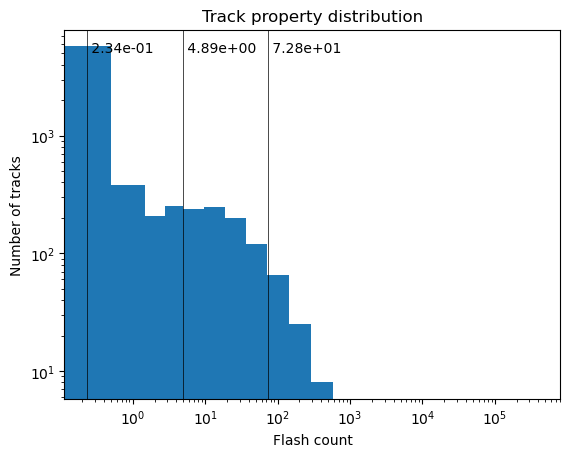

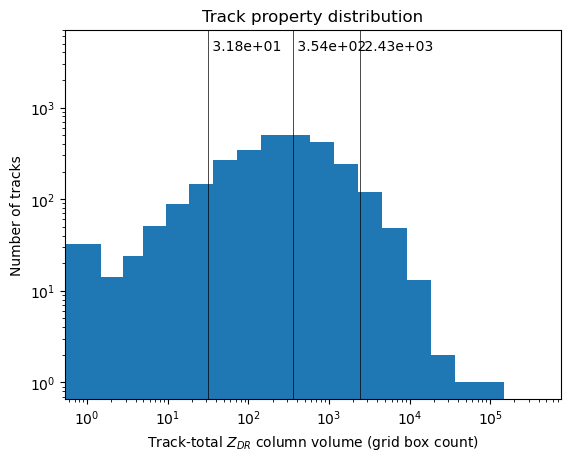

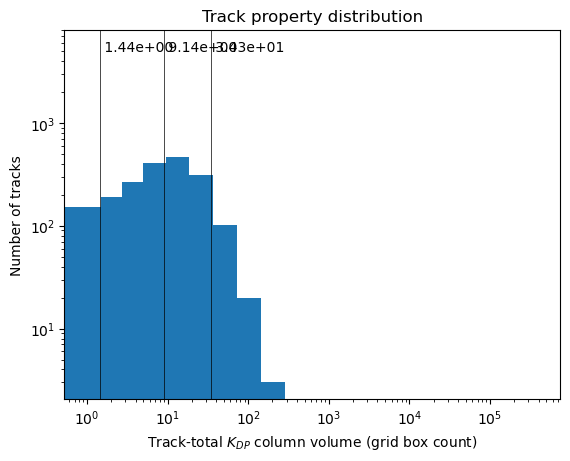

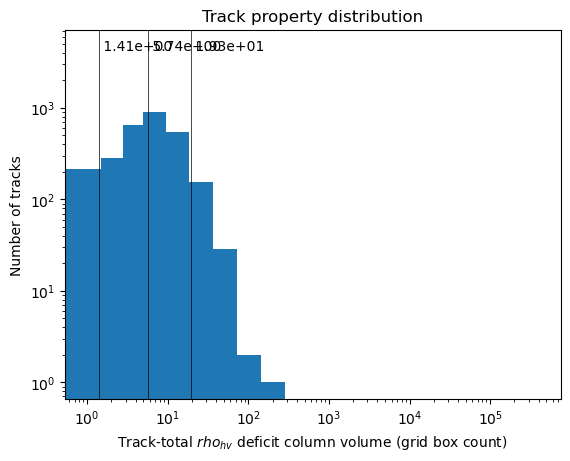

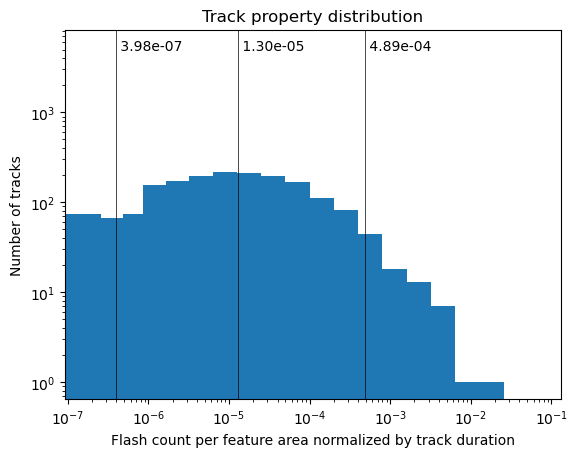

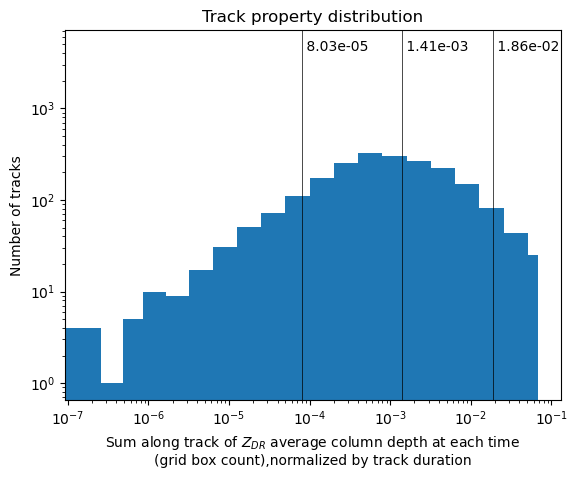

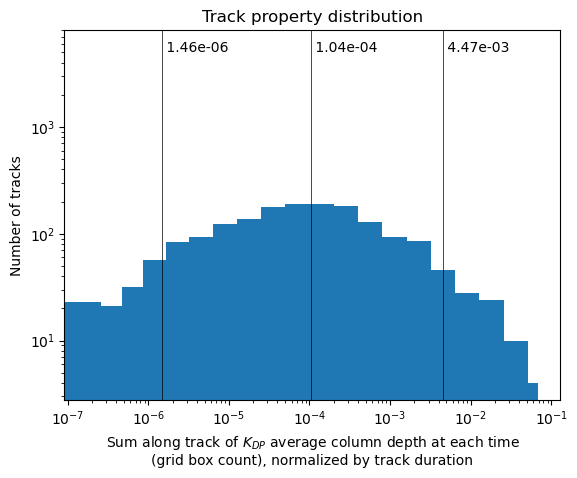

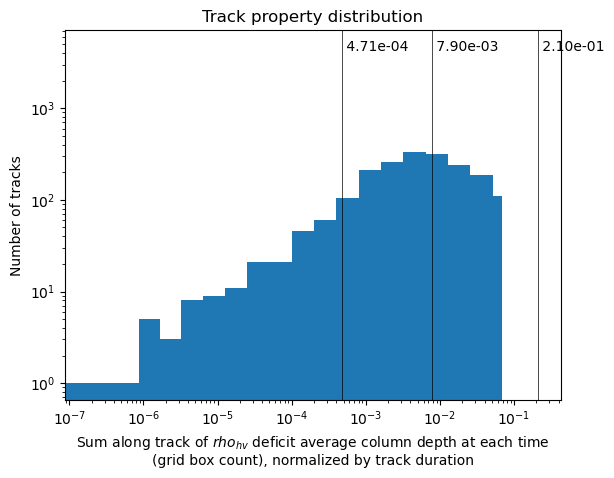

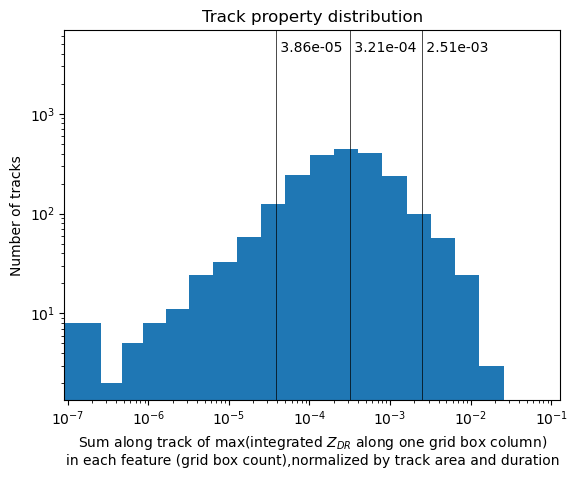

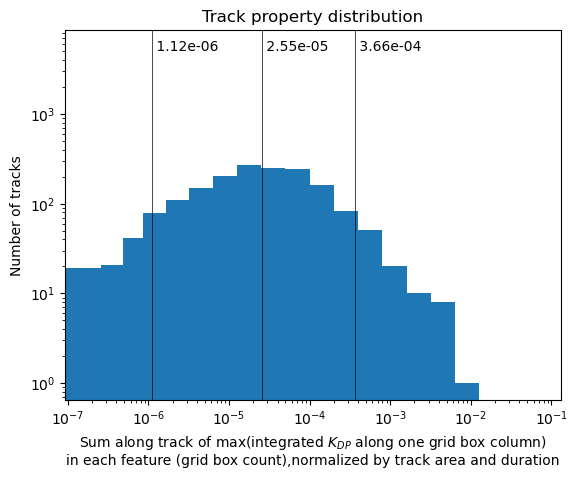

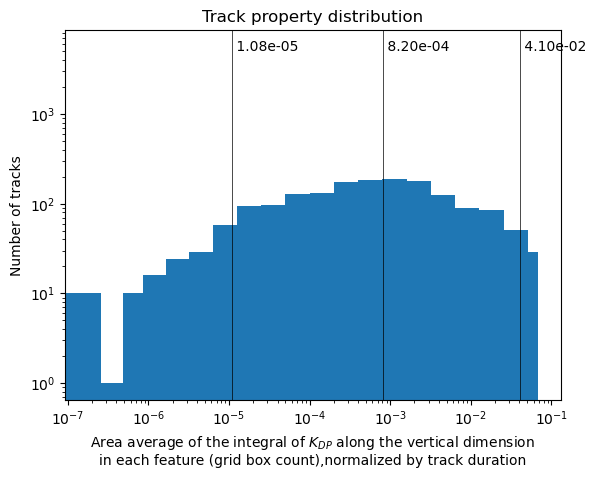

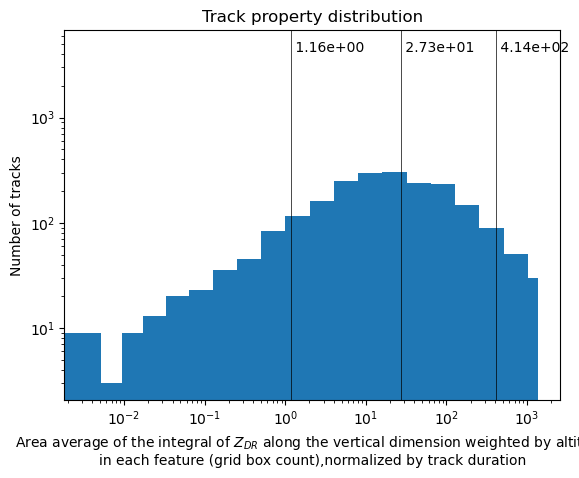

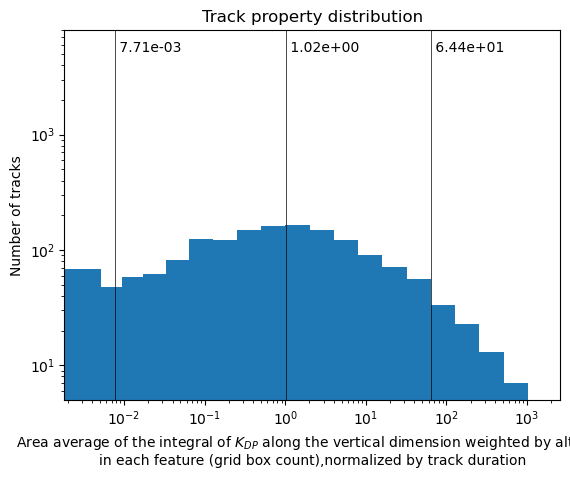

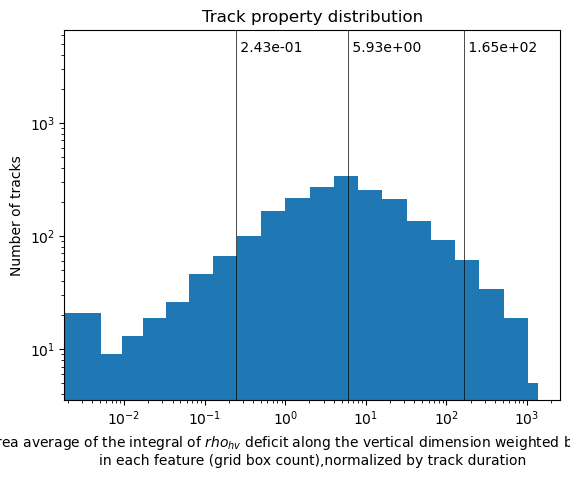

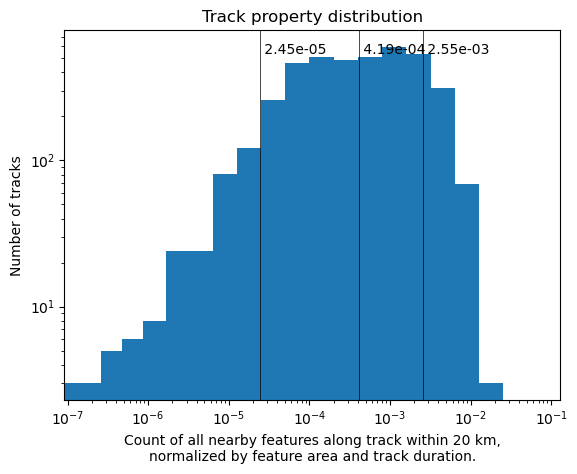

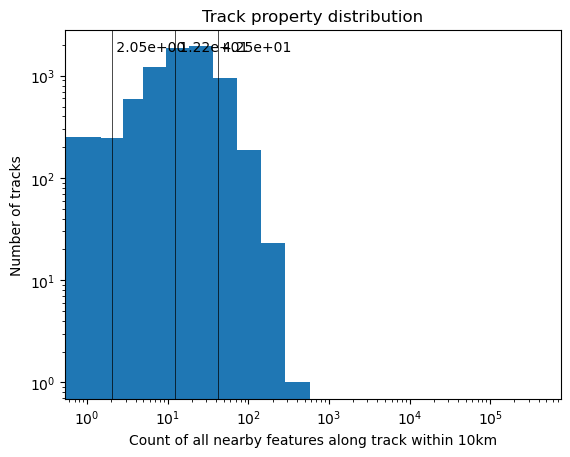

In [18]:
plot_1d_hists(agg_histo_ds)

In [19]:
# plot_1d_hists(histo_ds2)

In [20]:
from matplotlib.colors import LogNorm

def plot_2d_hists(histo_ds_all, plot_hist_names=None, normed=True):
    # Look at a representative dataset
    histo_ds = histo_ds_all[0]
    # Find the 2D histogram variables
    all_histo_names = sorted(k for k in histo_ds.data_vars.keys() if (len(histo_ds[k].dims)==2))
    # print(all_histo_names)          
    # only plot the normed histograms
    if plot_hist_names is None:
        if normed == True:
            plot_hist_names = [s for s in all_histo_names if (s.count('norm') == 2)]
        else:
            plot_hist_names = [s for s in all_histo_names if s.count('norm') == 0]
    
    hist_count = len(plot_hist_names)
    print(f"plotting {hist_count} histograms")
    combo_rows = int(np.ceil(hist_count/3))
    fig, axs = plt.subplots(combo_rows,3, figsize=(2*8, 2*combo_rows*2))
    all_axs = axs.flatten()
    
    for axi, var_name in enumerate(plot_hist_names):
        all_h = sum(hds[var_name] for hds in histo_ds_all)
        h = histo_ds[var_name]
        ax = all_axs[axi]
        bins = h[h.coords.dims[0]].values, h[h.coords.dims[1]].values
        all_h.T.plot(levels=17, norm=LogNorm(vmin=1, vmax=128), ax=ax)
        # Need to have the lower limit be the first bin so that it's nonnegative.
        ax.axis((bins[0][1]/10, bins[0][-1], bins[1][1]/10, bins[1][-1]))
        # ax.axis((0.1, 2048, 0.1, 2048))
        ax.set_xscale('log')
        ax.set_yscale('log')

    fig.tight_layout()
    return fig

In [21]:
def plot_paper_hists(histo_ds_all, paper_vars, normed=True):
    histo_ds = histo_ds_all[0]
    
    paper_var_histos = list(combinations(paper_vars,2))
    subplot_rows_cols = len(paper_vars)-1

    fig, axs = plt.subplots(subplot_rows_cols,subplot_rows_cols, figsize=(2*8.5, 2*8.5))
    all_axs = axs.flatten()

    # Plot a the triangular upper half
    row, column = 0, 0
    for paper_histo in paper_var_histos:
        var_name = '_'.join(['histogram', paper_histo[0], paper_histo[1]])
        # print(row, column, var_name)
        
        all_h = sum(hds[var_name] for hds in histo_ds_all)
        h = histo_ds[var_name]
        ax = axs[row,column]
        bins = h[h.coords.dims[0]].values, h[h.coords.dims[1]].values
        art = all_h.T.plot(levels=17, norm=LogNorm(vmin=1, vmax=128), ax=ax, cbar_ax=axs[3,0], cbar_kwargs={'label':None})
        art.set_rasterized(True)
        # Need to have the lower limit be the first bin so that it's nonnegative.
        ax.axis((bins[0][1]/10, bins[0][-1], bins[1][1]/10, bins[1][-1]))
        # ax.axis((0.1, 2048, 0.1, 2048))
        ax.set_xscale('log')
        ax.set_yscale('log')

        if column == 3: 
            row += 1
            column = row
        else:
            column += 1

    fig.tight_layout()
    return fig

In [22]:
fig_paper = plot_paper_hists([agg_histo_ds], paper_vars)

plotting 91 histograms


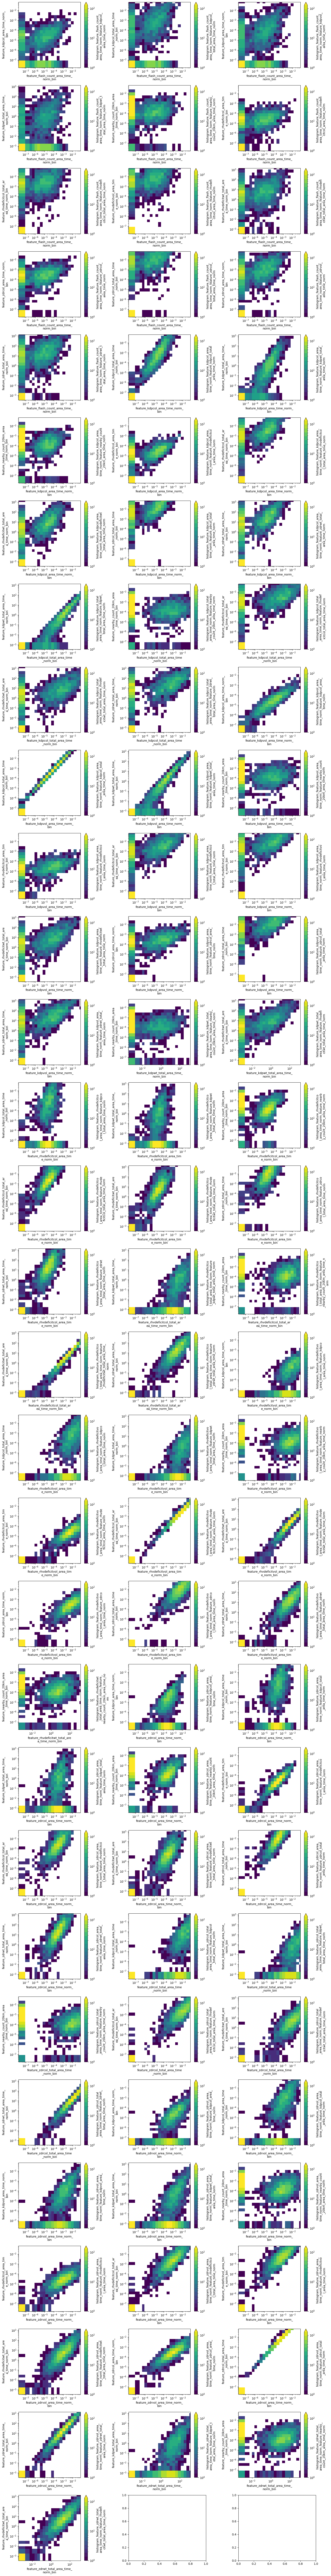

In [23]:
show_normed = True
if show_normed==False:
    norm_extension = '_raw'
else:
    norm_extension = ''

fig = plot_2d_hists([agg_histo_ds], normed=show_normed)

In [24]:
if const_melt:
    fig.savefig('joint_histos_constmelt'+norm_extension+'_'+this_category.replace('_','-')+'.pdf')
    fig_paper.savefig('joint_histos_constmelt_paper'+norm_extension+'_'+this_category.replace('_','-')+'.pdf')
else:
    fig.savefig('joint_histos_varymelt'+norm_extension+'_'+this_category.replace('_','-')+'.pdf')
    fig_paper.savefig('joint_histos_varymelt_paper'+norm_extension+'_'+this_category.replace('_','-')+'.pdf')

In [25]:
# plot_2d_hists([histo_ds, histo_ds2])